<a href="https://colab.research.google.com/github/Piyaphum/CNN_Dog-Cat_Classification/blob/main/CNN_Dog%26Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [83]:
train_dir = '/content/drive/MyDrive/Dataset/dogs-vs-cats/train_set'
val_dir = '/content/drive/MyDrive/Dataset/dogs-vs-cats/validation_set'
test_dir = '/content/drive/MyDrive/Dataset/dogs-vs-cats/test_set'

target_img_shape=(64,64)

In [84]:
#ตั้งค่า instance เพื่อการ train แล้ะใช้ ImageDataGenerator แล้วกำหนดให้ทำการ normalize pixel จากนั้นใช้ .flow_from_directory สั่งอ่านไฟล์จาก folder ที่อยู่ภายใต้ train_set สำหรับ training set เอาง่าย ๆ พวกภาพ cat, dog ทั้งหลายอ่ะ
train_datagen = ImageDataGenerator(rescale=1./255)
train_set = train_datagen.flow_from_directory(train_dir,
                                               target_size=target_img_shape,
                                               batch_size=32,
                                               class_mode='binary')

Found 1002 images belonging to 2 classes.


In [85]:
# อ่านภาพ validation set (val_set)
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size = target_img_shape,
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 801 images belonging to 2 classes.


**Visualization**
สรุปดูข้อมูลว่าแต่ละ class มีจำนวนภาพเท่าไหร่

In [86]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)
print(ids)
print(counts)

Training
[0 1]
[501 501]


In [87]:
# ใช้ for ช่วยให้เรียกดูได้ง่ายขึ้น
labels = train_set.class_indices
labels = dict((v,k) for k,v in labels.items())
print(labels)

for i in ids :
  print('{:>6} = {}' .format(labels[i], counts[i]))

{0: 'cat', 1: 'dog'}
   cat = 501
   dog = 501


In [88]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)
print(ids)
print(counts)

Validation
[0 1]
[500 301]


In [89]:
#เช็ตมิติของภาพ
train_set[0][0][0].shape

(64, 64, 3)

{'cat': 0, 'dog': 1}
(32, 64, 64, 3)
(32,)
class :  cat


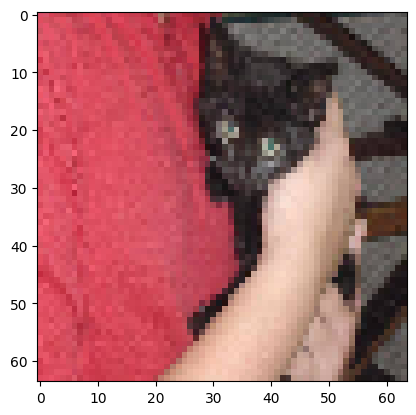

In [90]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
  print(image_batch.shape)
  print(labels_batch.shape)
  plt.imshow(image_batch[0])
  print('class : ', labels[labels_batch[0]])
  break

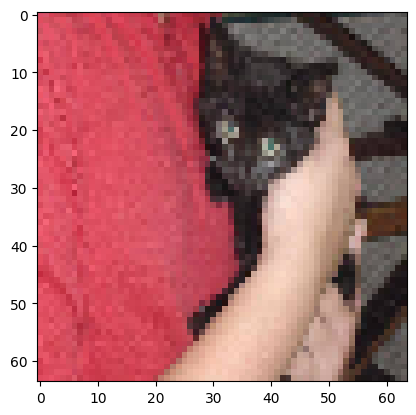

In [91]:
plt.imshow(train_set[0][0][0]) #ดูภาพจากใน train_set
plt.show()

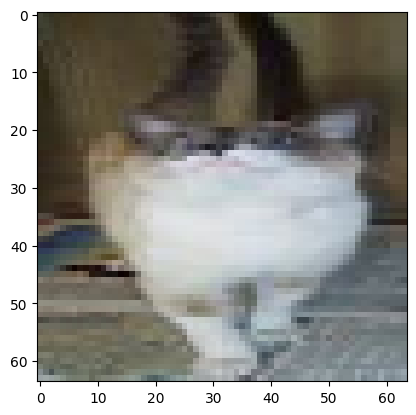

In [116]:
plt.imshow(val_set[0][0][1]) #ดูภาพจากใน val_set
plt.show()

**สร้าง Model**

In [92]:
#สร้าง CNN โดยตอนแรกเราจะกำหนดขนาดมิติที่จะใช้เป็น imput model หรือ input shape โดยที่มันต้องเท่ากับ resize ที่กำหนดไว้
in_shape = (target_img_shape[0], target_img_shape[1], 3)
in_shape

(64, 64, 3)

In [93]:
#สร้าง model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [94]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

**Compile + Train**

In [95]:
#ทำการ compile แล้วก็ train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [96]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                    validation_data=val_set,
                    epochs=20, verbose=1)
end = time.time()
print('Time Taken is {:.2f} minutes' .format((end-start)/60))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 337s 11s/step - accuracy: 0.5017 - loss: 0.7259 - val_accuracy: 0.3758 - val_loss: 0.7356
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 449ms/step - accuracy: 0.5193 - loss: 0.6979 - val_accuracy: 0.3758 - val_loss: 0.7226
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 476ms/step - accuracy: 0.5585 - loss: 0.6851 - val_accuracy: 0.4032 - val_loss: 0.7380
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 463ms/step - accuracy: 0.5865 - loss: 0.6583 - val_accuracy: 0.6816 - val_loss: 0.6191
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 445ms/step - accuracy: 0.6522 - loss: 0.6197 - val_accuracy: 0.5268 - val_loss: 0.8295
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 444ms/step - accuracy: 0.7014 - loss: 0.5775 - val_accuracy: 0.6679 - val_loss: 0.6251
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 593ms/step - accuracy: 0.7556 - loss: 0.5111 - val_accuracy: 0.6866 - val_loss: 0.6050
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 465ms/step - accuracy: 0.7787 - loss: 0.4549 - val_accur

**ประเมิน**

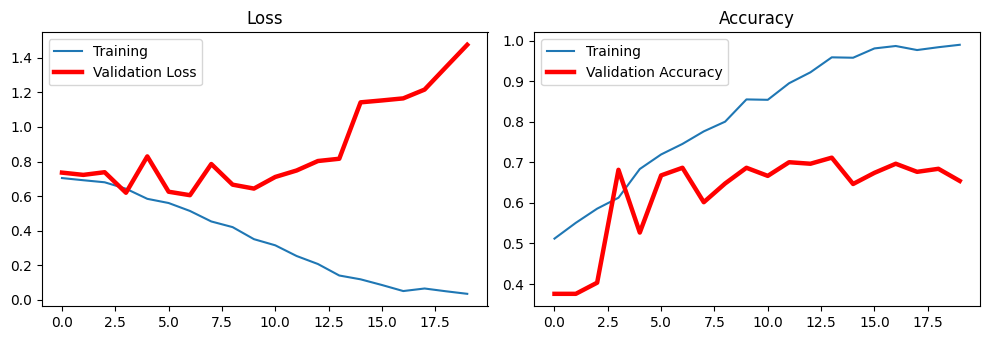

In [97]:
#พล็อต loss accuracy จะเห้นได้ว่า loss ควรจะลดลงตามรอบ epoch ที่เพิ่มขึ้น แต่เราจะเห็นได้ว่า loss กลับเพิ่มขึ้นตามเส้นกราฟ ปัญหาเกิดจากการที่ภาพข้อมูลในการเทรนน้อยเกินไป
plt.figure(figsize=(10, 3.5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], 'r', lw=3.2, label='Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('Score = {:.3f}' .format(acc[1]))
#ประเมินได้ 65.4% ถือว่าไม่ค่อยดีเท่าไหร่ ต้องเพิ่มจำนวนภาพในการเทรน+เพิ่มรอบจำนวน Epoch

Score = 0.654


**ทดสอบและใช้งาน Model Predict ภาพ**

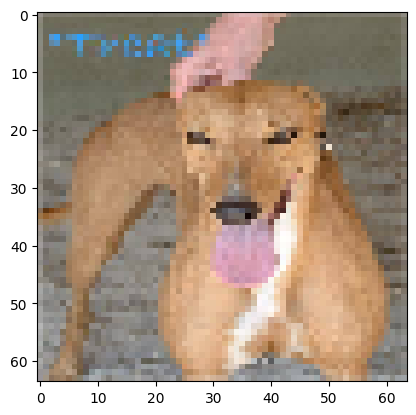

In [101]:
#ทกลองให้ model predict ตัวภาพ โดยที่เราจะเตรียมภาพหมาแมว แล้วส่งไป predict แต่ก่อนอื่นเราต้อง normalize ตัวภาพก่อน
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64,64)
test_image = image.load_img('/content/drive/MyDrive/Dataset/dogs-vs-cats/test_set/dog.1001.jpg', target_size=target_img_shape)

test_image = image.img_to_array(test_image)
test_image /= 255.0

plt.imshow(test_image)
plt.show()

In [102]:
test_image = np.expand_dims(test_image, axis=0)

In [103]:
test_image.shape

(1, 64, 64, 3)

In [104]:
#ทำการ predict หาค่า 0 <= prob(x) <= 1
result = model.predict(test_image)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


array([[0.7338407]], dtype=float32)

In [105]:
#ตรวจสอบค่า label ของ class จะได้ว่า 0 = แมว แต่ถ้าได้ 1 = หมา
train_set.class_indices

{'cat': 0, 'dog': 1}

In [106]:
#นำไปเทียบโดยตัด threshold = 0.5 ถ้าค่าได้มากกว่า threshold แปลว่าภาพที่นำมา predict มีคลาสเป็น 1 นั่นคือหมานั่นเอง
if result[0][0] > 0.5 :
  predict = 'Dog'
else :
  predict = 'Cat'

print(predict)

Dog


In [114]:
#นำภาพใน folder test_set มาทดสอบ predict เพราะว่ามันมีหลายภาพเยอะเกิน ก็เลยสร้าง function ไว้คอยอ่านภาพแล้วค่อย predict เอา
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_dog_cat(lst) :
  y_pred = []; y_pred_cls = []; img_lst = []
  for i in lst :
    img = load_img(i, target_size=target_img_shape)
    img = img_to_array(img)
    img /= 255.0
    img_lst.append(img)

    img = np.expand_dims(img, axis=0)
    y_pred_i = model.predict(img)
    y_pred_cls_i = 'Dog' if y_pred_i > 0.5 else 'Cat' #ให้ Threshold = 0.5
    y_pred.append(y_pred_i)
    y_pred_cls.append(y_pred_cls_i)

  return img_lst, y_pred_cls, y_pred

In [115]:
#นำภาพ หมาและแมว ไปใส่ใน folder test_set แล้วสั่งสแกน folder อ่านไฟล์ไปที่ predict
import glob

mylist = [f for f in glob.glob('/content/drive/MyDrive/Dataset/dogs-vs-cats/test_set/*.jpg')]
img_lst, y_pred_cls, y_pred = predict_dog_cat(mylist)

mylist
for i in mylist:
  print(os.path.basename(i), end='|')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━